# **Amaury Félix Díaz**

# Reto: Aprendizaje supervisado

In [21]:
from sklearn import cluster, metrics
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
employees = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science and AI/Sexta sesión/Train.csv')
employees

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [4]:
employees.dtypes

,0
Employee_ID,object
Gender,object
Age,float64
Education_Level,int64
Relationship_Status,object
Hometown,object
Unit,object
Decision_skill_possess,object
Time_of_service,float64
Time_since_promotion,int64


In [5]:
employees.nunique()

,0
Employee_ID,7000
Gender,2
Age,47
Education_Level,5
Relationship_Status,2
Hometown,5
Unit,12
Decision_skill_possess,4
Time_of_service,44
Time_since_promotion,5


In [19]:
stats = employees.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Age,6588.0,39.622799,13.606920,19.0000,27.0000,37.00000,52.0000,65.0000
Education_Level,7000.0,3.187857,1.065102,1.0000,3.0000,3.00000,4.0000,5.0000
Time_of_service,6856.0,13.385064,10.364188,0.0000,5.0000,10.00000,21.0000,43.0000
Time_since_promotion,7000.0,2.367143,1.149395,0.0000,1.0000,2.00000,3.0000,4.0000
growth_rate,7000.0,47.064286,15.761406,20.0000,33.0000,47.00000,61.0000,74.0000
Travel_Rate,7000.0,0.817857,0.648205,0.0000,0.0000,1.00000,1.0000,2.0000
Post_Level,7000.0,2.798000,1.163721,1.0000,2.0000,3.00000,3.0000,5.0000
Pay_Scale,6991.0,6.006294,2.058435,1.0000,5.0000,6.00000,8.0000,10.0000
Work_Life_balance,6989.0,2.387895,1.122786,1.0000,1.0000,2.00000,3.0000,5.0000
VAR1,7000.0,3.098571,0.836377,1.0000,3.0000,3.00000,3.0000,5.0000


In [16]:
employees.isna().sum()

,0
Employee_ID,0
Gender,0
Age,412
Education_Level,0
Relationship_Status,0
Hometown,0
Unit,0
Decision_skill_possess,0
Time_of_service,144
Time_since_promotion,0


In [22]:
employees['Age'].fillna(employees['Age'].median(), inplace = True)
employees['Time_of_service'].fillna(employees['Time_of_service']. median(), inplace = True)
employees['Pay_Scale'].fillna(employees['Pay_Scale'].median(), inplace = True)
employees['Work_Life_balance'].fillna(employees['Work_Life_balance'].median(), inplace = True)
employees['VAR2'].fillna(employees['VAR2'].mean(), inplace = True)
employees['VAR4'].fillna(employees['VAR4'].median(), inplace = True)

In [23]:
employees.isna().sum()

,0
Employee_ID,0
Gender,0
Age,0
Education_Level,0
Relationship_Status,0
Hometown,0
Unit,0
Decision_skill_possess,0
Time_of_service,0
Time_since_promotion,0


In [24]:
employees2 = employees.copy()
for col in employees2.columns:
    if employees2[col].dtype == 'object':
        employees2[col] = OrdinalEncoder().fit_transform(employees2[[col]])
X_train = employees2.to_numpy()
print(X_train)

[[4.143e+03 0.000e+00 4.200e+01 ... 5.000e+00 3.000e+00 1.841e-01]
 [2.500e+03 1.000e+00 2.400e+01 ... 5.000e+00 3.000e+00 6.700e-02]
 [5.312e+03 0.000e+00 5.800e+01 ... 8.000e+00 3.000e+00 8.510e-02]
 ...
 [6.472e+03 0.000e+00 4.900e+01 ... 8.000e+00 3.000e+00 7.847e-01]
 [3.018e+03 0.000e+00 4.700e+01 ... 6.000e+00 3.000e+00 4.162e-01]
 [2.015e+03 0.000e+00 5.800e+01 ... 5.000e+00 3.000e+00 9.100e-02]]


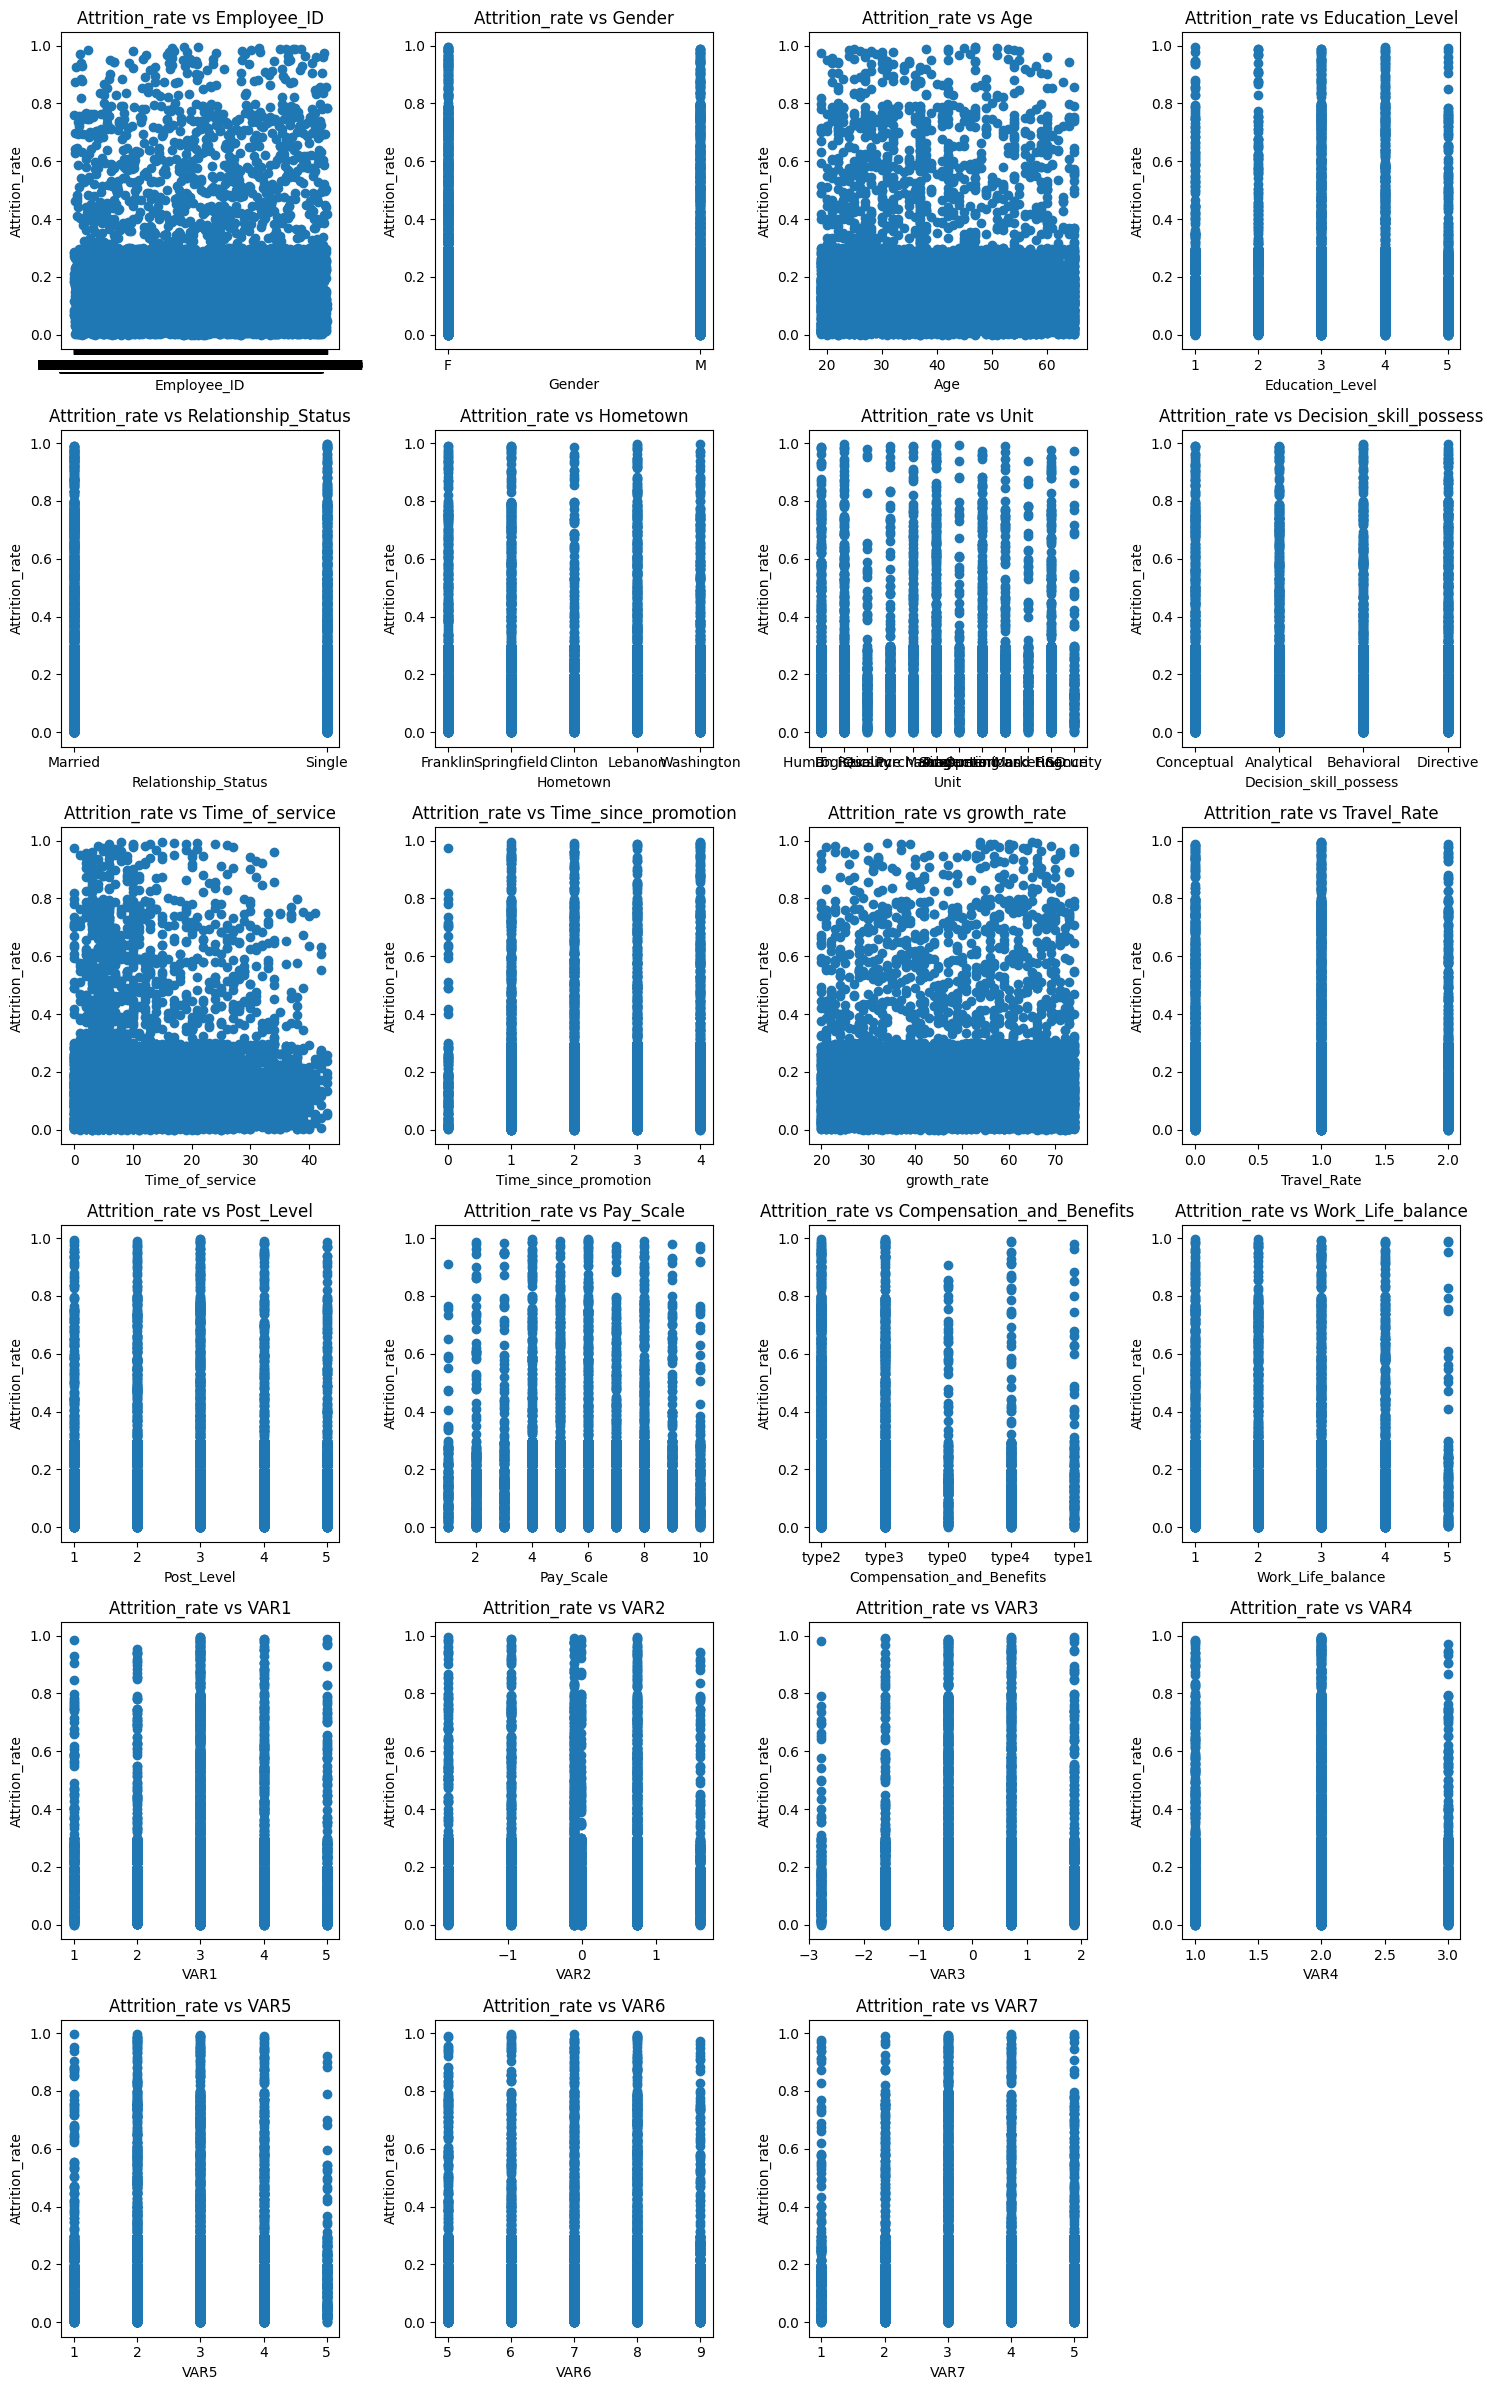

In [26]:
columns_to_compare = [col for col in employees.columns if col != 'Attrition_rate']

num_rows = (len(columns_to_compare) + 3) // 4
num_cols = 4

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

axs = axs.flatten()

for i, column in enumerate(columns_to_compare):
    axs[i].scatter(employees[column], employees['Attrition_rate'])
    axs[i].set_title(f'Attrition_rate vs {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Attrition_rate')

for i in range(len(columns_to_compare), num_rows * num_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [27]:
X = StandardScaler().fit_transform(X_train)

In [52]:
X2 = StandardScaler().fit_transform(X_train)

In [28]:
nc = 10

In [29]:
np.random.seed(42)

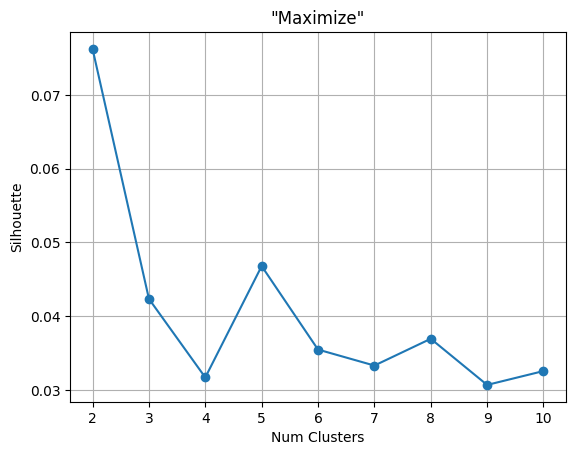

In [113]:
results = {}
for k in range(2, nc + 1):
  k_means = cluster.KMeans(n_clusters = k).fit(X)
  y_pred = k_means.predict(X)
  results[k] = metrics.silhouette_score(X, y_pred)
clusters_counts = list(results.keys())
index_values = list(results.values())
plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(clusters_counts)
plt.ylabel('Silhouette')
plt.show()

Text(0, 0.5, 'Calinski Harabasz')

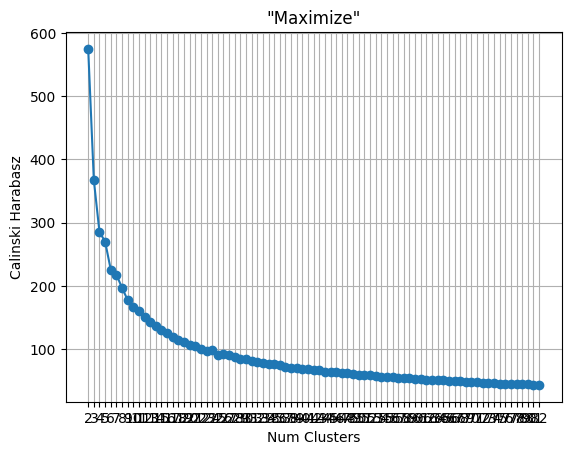

In [118]:
y_preds2 = []
results2 = {}
for k in range(2, int(np.sqrt(len(X2)))):
  k_means = cluster.KMeans(n_clusters=k).fit(X2)
  y_pred2 = k_means.predict(X2)
  y_preds2.append(y_pred2)
  results[k] = metrics.calinski_harabasz_score(X, y_pred2)

clusters_counts = list(results.keys())
index_values = list(results.values())

plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(clusters_counts)
plt.ylabel('Calinski Harabasz')

In [114]:
k = 5  # Segun la grafica de Silhouette
k_means = cluster.KMeans(n_clusters=k).fit(X)
y_pred = k_means.predict(X)
employees['groups'] = y_pred

In [115]:
employees['groups'].groupby(employees['groups']).count()

,groups
groups,
0,540
1,1506
2,1820
3,1049
4,2085


In [116]:
for g in range(k):
    group_employees = employees[employees['groups'] == g]
    print('Group ' + str(g), 'has', len(group_employees), 'employees')

Group 0 has 540 employees
Group 1 has 1506 employees
Group 2 has 1820 employees
Group 3 has 1049 employees
Group 4 has 2085 employees


In [117]:
grouped = pd.DataFrame()
grouped['Features'] = employees.columns[:-1]
for g in range(k):
    arr = []
    group_employees = employees[employees['groups'] == g]
    for col in grouped['Features']:
        if group_employees[col].dtype != 'object':
            arr.append(np.round(group_employees[col].mean(), 2))
        else:
            arr.append(group_employees[col].value_counts().idxmax())
    grouped['Group'+str(g)] = arr
grouped

,Features,Group0,Group1,Group2,Group3,Group4
0,Employee_ID,EID_8077,EID_11159,EID_1640,EID_21257,EID_19922
1,Gender,F,M,F,F,F
2,Age,37.31,30.08,52.39,51.6,29.43
3,Education_Level,3.15,3.22,3.19,3.18,3.18
4,Relationship_Status,Married,Married,Married,Single,Married
5,Hometown,Lebanon,Lebanon,Lebanon,Lebanon,Lebanon
6,Unit,IT,IT,IT,IT,IT
7,Decision_skill_possess,Conceptual,Analytical,Behavioral,Behavioral,Analytical
8,Time_of_service,11.27,6.33,22.75,22.28,6.14
9,Time_since_promotion,2.39,2.2,2.51,2.49,2.29
